<font size="6">Hausaufgabe 1.2 (Schätzen für eine Verteilung mit Dichte)

In [4]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
from ipywidgets import interact
import ipywidgets as widgets
from scipy.special import comb
from scipy.stats import binom
from scipy.special import factorial


In [6]:
%%latex
Wir wollen den Parameter $\theta$ in folgender Dichte schätzen:
\[
f_\theta(x)=(\theta+1)x^\theta \mathbb{1}_{[0, 1]}(x)
    \]

<IPython.core.display.Latex object>

In [18]:
def densityplot(theta):
    x=np.arange(0, 1, 0.001)
    y=(theta+1)*np.power(x, theta)
    plt.plot(x, y)
    plt.show()

slider_theta=widgets.FloatSlider(value=1, min=0.1, max=10, description='theta', description_width='auto', orientation='horizontal', layout=widgets.Layout(width='500px'), readout=True)
interact(densityplot, theta=slider_theta)

interactive(children=(FloatSlider(value=1.0, description='theta', layout=Layout(width='500px'), max=10.0, min=…

<function __main__.densityplot(theta)>

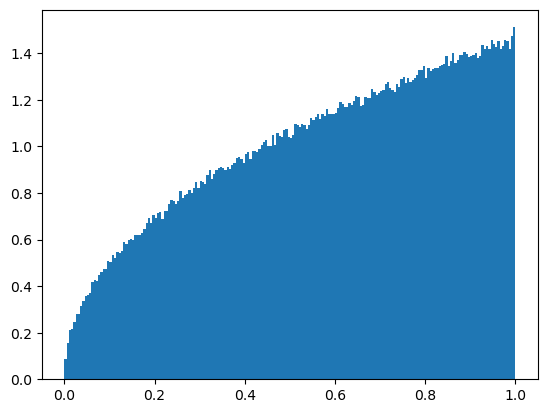

In [114]:
#Referenz für pseudo-Zufallszahl. Kann beliegib geändert werden, um neue Beispiele zu erzeugen.
np.random.seed(42899)
#Nehme (pseudo)-zufallszahl theta_sampled zwischen 0.1 und 6
theta_sampled=np.random.uniform(0.1, 0.5)
#Nehme Stichprobe der Länge 'size', welche entsprechend der obigen Dichte zum Parameter theta_sampled verteilt ist
size=1000000
y=np.random.uniform(0, 1, size)
x=np.power(y, 1/(theta_sampled+1))
plt.hist(x, bins=200, density=True)
plt.show()

In [116]:
%%latex
Nach Hausaufgabe ist ein ML Schätzer für $\theta$ gegeben durch 
\[
\hat{\theta}=\frac{n}{\sum_k^n\log(1/X_k)}-1
    \]

<IPython.core.display.Latex object>

In [118]:
#Bei unseren Daten
theta_hat=size/(np.sum(np.log(1/x)))-1
print(theta_hat)

0.46504449304288786


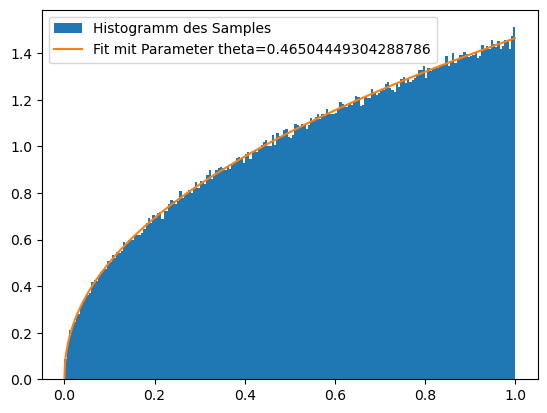

In [120]:
plt.hist(x, bins=200, density=True, label='Histogramm des Samples')
k=np.arange(0, 1, 0.001)
z=(theta_hat+1)*np.power(k, theta_hat)
plt.plot(k, z, label=f'Fit mit Parameter theta={theta_hat}')
plt.legend()
plt.show()